## Exploratory visualization

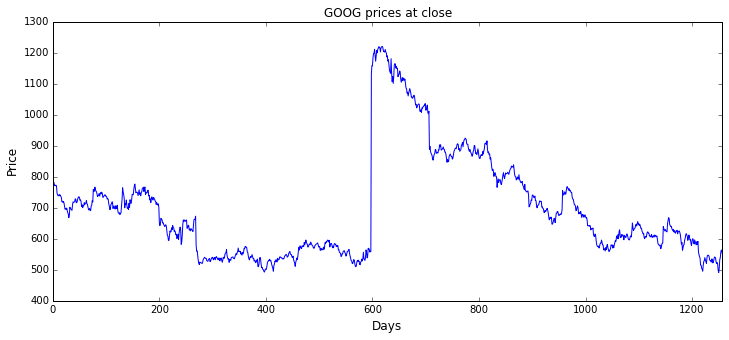

The above graph display GOOG prices at close.
Challenge #1: The data is displayed backwards in time when ready the data directly from the csv file.
Challenge #2: Only one stock is displayed in the graph. We need to add more stocks for comparison.
Challenge #3: The graph shows 5 years worth of data.  Let's only view the last 2 years in the next graph.


Let's fix these challenges in the next visual...




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

def plot_prices():
    
    plt.figure(figsize=(12,5))
    df = pd.read_csv("data/GOOG.csv")
    df ['Close'].plot()
    plt.xlabel('Days', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.title('GOOG prices at close')
    plt.show()
    
    print "The above graph display GOOG prices at close."
    print "Challenge #1: The data is displayed backwards in time when ready the data directly from the csv file."  
    print "Challenge #2: Only one stock is displayed in the graph. We need to add more stocks for comparison."
    print "Challenge #3: The graph shows 5 years worth of data.  Let's only view the last 2 years in the next graph."
    print '\n'
    print "Let's fix these challenges in the next visual..."
    print '\n'

if __name__ == "__main__":
    plot_prices()


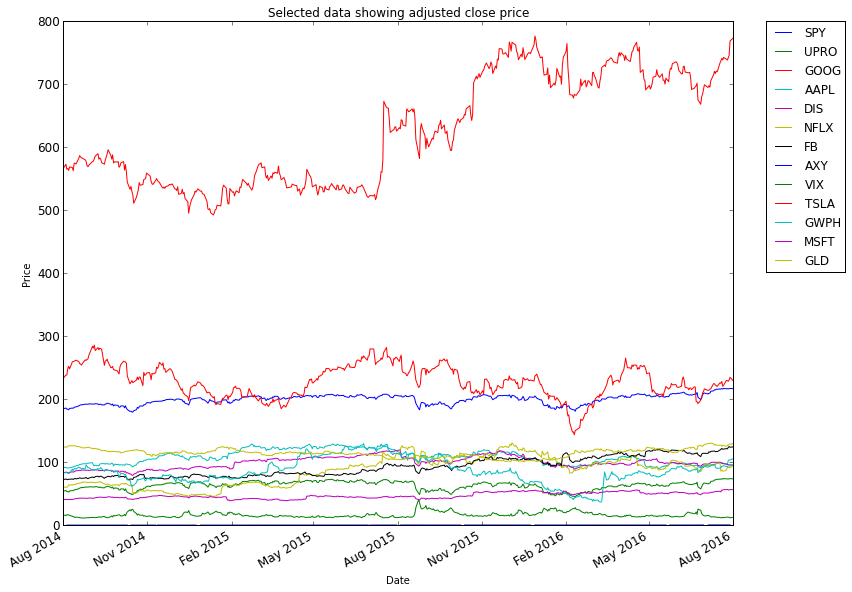

The above graph displays the list of stocks I've been tracking for a few years.


Progress from last visual...
- Overcame the challenge of showing more than one stock in a graph. The graph is now showing multiple stocks.
- Also, overcame the challenge of creating redundant code by creating a utility function to pull data from each csv file.
- Resolved the challenge of the data displaying stock prices in reverse order.
- Sliced the data to show 2 years worth of data.  The csv files cover 5 years worth of data.


Challenge: It is hard to visually assess the stocks at different price points.
This can be resolved by normalizing the data.  Let's fix this challenge in the next visual...




In [3]:
import os

def plot_selected(df, columns, start_index, end_index):

    plot_data(df.ix[start_index:end_index,columns], title="Selected data showing adjusted close price")

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title,fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2014-08-01', '2016-08-01')

    # Choose stock symbols to read
    symbols = ['UPRO','GOOG','AAPL','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)

    # Slice and plot
    plot_selected(df, ['SPY','UPRO','GOOG','AAPL','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD'], '2014-08-01', '2016-08-01')

    print "The above graph displays the list of stocks I've been tracking for a few years."
    print '\n'
    print "Progress from last visual..." 
    print "- Overcame the challenge of showing more than one stock in a graph. The graph is now showing multiple stocks."
    print "- Also, overcame the challenge of creating redundant code by creating a utility function to pull data from each csv file."
    print "- Resolved the challenge of the data displaying stock prices in reverse order."
    print "- Sliced the data to show 2 years worth of data.  The csv files cover 5 years worth of data."
    print '\n'
    print "Challenge: It is hard to visually assess the stocks at different price points."  
    print "This can be resolved by normalizing the data.  Let's fix this challenge in the next visual..." 
    print '\n'

if __name__ == "__main__":
    test_run()

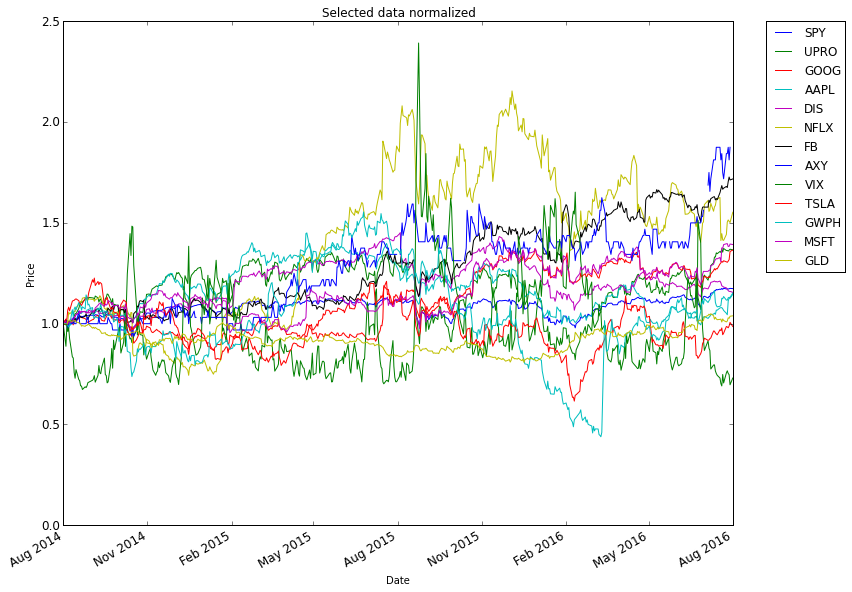

The above graph normalizes the stock data at a starting point of 1 dollar.


Challenge: Too many stocks in one graph.  The same colours are used more than once.
I will divide the stocks into smaller groups...




In [6]:
def plot_selected(df, columns, start_index, end_index):
    
    plot_data(df.ix[start_index:end_index,columns], title="Selected data showing adjusted close price")
    
    df = df.ix[start_index: end_index, columns]

def plot_selected_normalize(df, columns, start_index, end_index):
    
    # Normalize stock prices
    df = normalize_data(df)
    
    plot_data(df.ix[start_index:end_index,columns], title="Selected data normalized")
    
    df = df.ix[start_index: end_index, columns]

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

def normalize_data(df):
    return df/ df.ix[0,:]

def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title, fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2014-08-01', '2016-08-01')

    # Choose stock symbols to read
    symbols = ['UPRO','GOOG','AAPL','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)
    
    # Slice and plot
    # plot_selected(df, ['SPY', 'GOOG'], '2014-08-01', '2016-08-01')
    
    # Normalize and plot
    plot_selected_normalize(df, ['SPY','UPRO','GOOG','AAPL','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD'], '2014-08-01', '2016-08-01')

    print "The above graph normalizes the stock data at a starting point of 1 dollar."
    print '\n'
    print "Challenge: Too many stocks in one graph.  The same colours are used more than once."  
    print "I will divide the stocks into smaller groups..." 
    print '\n'
    
if __name__ == "__main__":
    test_run()

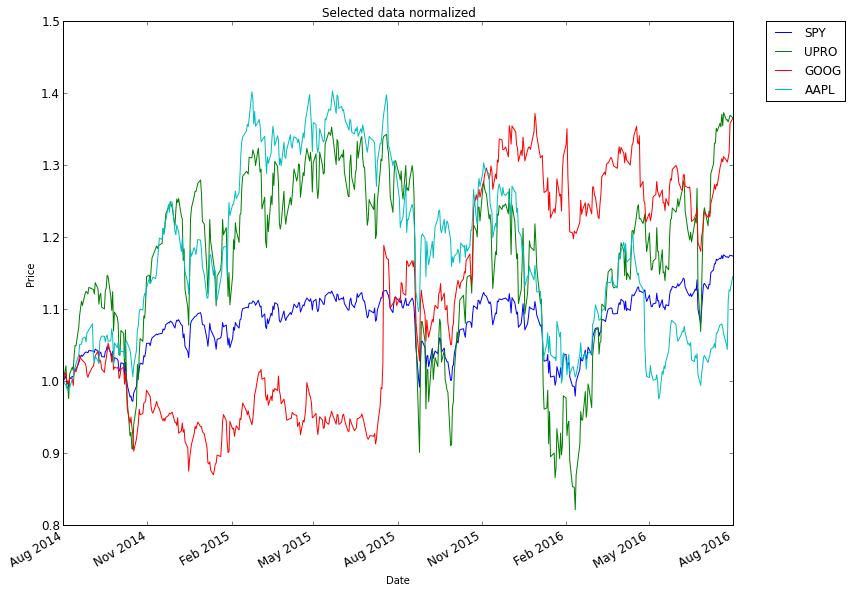

In [9]:
def plot_selected_normalize(df, columns, start_index, end_index):
    
    # Normalize stock prices
    df = normalize_data(df)
    
    plot_data(df.ix[start_index:end_index,columns], title="Selected data normalized")
    
    df = df.ix[start_index: end_index, columns]

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

def normalize_data(df):
    return df/ df.ix[0,:]

def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title, fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2014-08-01', '2016-08-01')

    # Choose stock symbols to read
    symbols = ['UPRO','GOOG','AAPL','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)
    
    # Normalize and plot
    plot_selected_normalize(df, ['SPY','UPRO','GOOG','AAPL'], '2014-08-01', '2016-08-01')
    
if __name__ == "__main__":
    test_run()

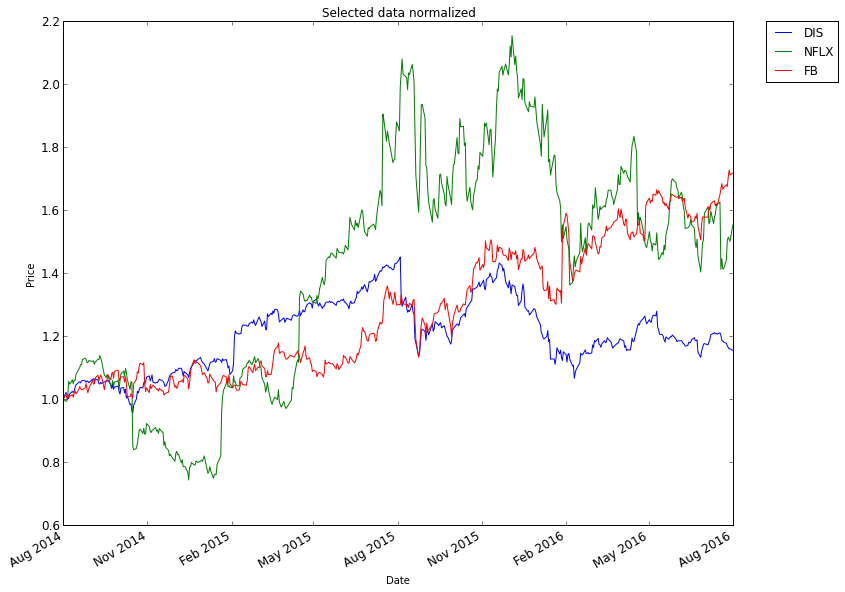

In [10]:
def plot_selected(df, columns, start_index, end_index):
    
    plot_data(df.ix[start_index:end_index,columns], title="Selected data showing adjusted close price")
    
    df = df.ix[start_index: end_index, columns]

def plot_selected_normalize(df, columns, start_index, end_index):
    
    # Normalize stock prices
    df = normalize_data(df)
    
    plot_data(df.ix[start_index:end_index,columns], title="Selected data normalized")
    
    df = df.ix[start_index: end_index, columns]

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

def normalize_data(df):
    return df/ df.ix[0,:]

def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title, fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2014-08-01', '2016-08-01')

    # Choose stock symbols to read
    symbols = ['UPRO','GOOG','AAPL','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)
    
    # Slice and plot
    # plot_selected(df, ['SPY', 'GOOG'], '2014-08-01', '2016-08-01')
    
    # Normalize and plot
    plot_selected_normalize(df, ['DIS','NFLX','FB'], '2014-08-01', '2016-08-01')

    
if __name__ == "__main__":
    test_run()

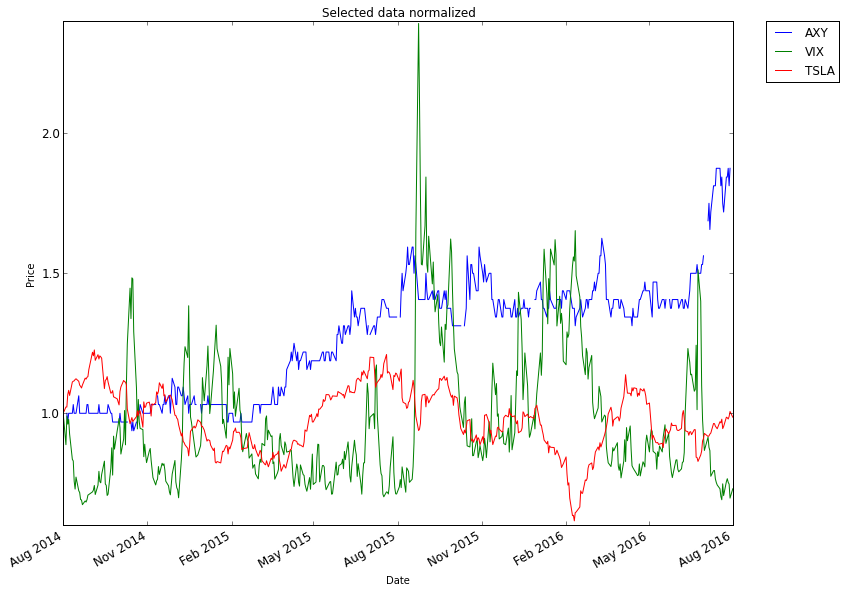

In [11]:
def plot_selected(df, columns, start_index, end_index):
    
    plot_data(df.ix[start_index:end_index,columns], title="Selected data showing adjusted close price")
    
    df = df.ix[start_index: end_index, columns]

def plot_selected_normalize(df, columns, start_index, end_index):
    
    # Normalize stock prices
    df = normalize_data(df)
    
    plot_data(df.ix[start_index:end_index,columns], title="Selected data normalized")
    
    df = df.ix[start_index: end_index, columns]

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

def normalize_data(df):
    return df/ df.ix[0,:]

def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title, fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2014-08-01', '2016-08-01')

    # Choose stock symbols to read
    symbols = ['UPRO','GOOG','AAPL','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)
    
    # Normalize and plot
    plot_selected_normalize(df, ['AXY','VIX','TSLA'], '2014-08-01', '2016-08-01')

    
if __name__ == "__main__":
    test_run()

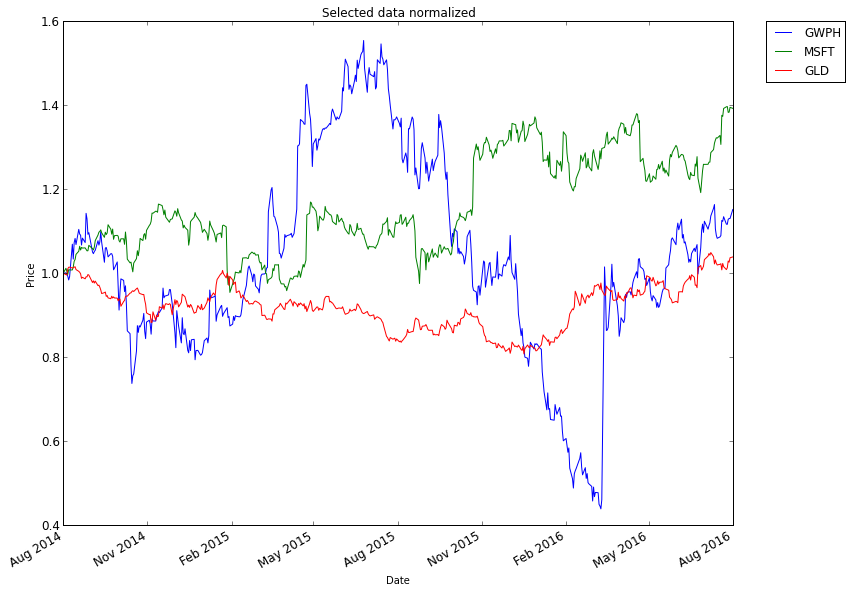

In [12]:
def plot_selected(df, columns, start_index, end_index):
    
    plot_data(df.ix[start_index:end_index,columns], title="Selected data showing adjusted close price")
    
    df = df.ix[start_index: end_index, columns]

def plot_selected_normalize(df, columns, start_index, end_index):
    
    # Normalize stock prices
    df = normalize_data(df)
    
    plot_data(df.ix[start_index:end_index,columns], title="Selected data normalized")
    
    df = df.ix[start_index: end_index, columns]

def symbol_to_path(symbol, base_dir="data"):
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

def normalize_data(df):
    return df/ df.ix[0,:]

def plot_data(df, title="Stock prices"):
    ax = df.plot(title=title, fontsize=12,figsize=(12,10))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2014-08-01', '2016-08-01')

    # Choose stock symbols to read
    symbols = ['UPRO','GOOG','AAPL','DIS','NFLX','FB','AXY','VIX','TSLA','GWPH','MSFT','GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)
    
    # Normalize and plot
    plot_selected_normalize(df, ['GWPH','MSFT','GLD'], '2014-08-01', '2016-08-01')
    
if __name__ == "__main__":
    test_run()